<a href="https://colab.research.google.com/github/puja-maitra/Unclear/blob/main/Week2_Assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#importing all required packages
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D


In [3]:
import pandas as pd
train_df=pd.read_csv('/content/gdrive/My Drive/digit-recognizer/train.csv')
test_df=pd.read_csv('/content/gdrive/My Drive/digit-recognizer/test.csv')

In [4]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
classes = ['0','1','2','3','4','5','6','7','8','9']
train_df1 = train_df.head(int(0.7*(len(train_df))))
val_df = train_df[ int(0.7*(len(train_df))) : ]
target = train_df1.pop('label')
target_val = val_df.pop('label')
train_dataset = tf.data.Dataset.from_tensor_slices((train_df1.values, target.values))
val_dataset = tf.data.Dataset.from_tensor_slices((val_df.values , target_val.values))
test_dataset=tf.data.Dataset.from_tensor_slices(test_df.values)


In [6]:
#training and validation datasets
train_ds_size= len(train_dataset)
val_ds_size= len(val_dataset)

In [7]:
num_train_examples = len(train_dataset)
num_test_examples = len(test_dataset)

In [8]:
#exploring the preprocessed data was done above when we printed the DataFrame
#it gave us the number of rows, columns for the training test

In [9]:
def normalize(images, labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return images, labels

def normalize2(images):
  images = tf.cast(images , tf.float32)
  images/=255
  return images

#applying to the datasets
train_dataset=train_dataset.map(normalize)
test_dataset =test_dataset.map(normalize2)
val_dataset = val_dataset.map(normalize)

#caching to make training faster
train_dataset = train_dataset.cache()
val_dataset = val_dataset.cache()
test_dataset = test_dataset.cache()
test_dataset1 = test_dataset

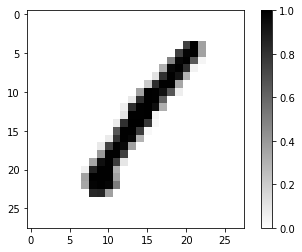

In [10]:
#exploring the processed data: Part 1
for image, labels in train_dataset.take(1):
  break
image = image.numpy().reshape((28,28))  

#plotting the image
plt.figure()
plt.imshow(image , cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

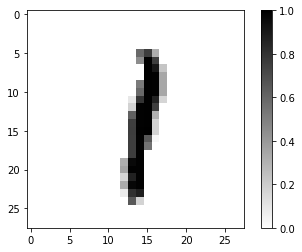

In [11]:
#exploring the processed data: Part Val_ds
for image, labels in val_dataset.take(1):
  break
image = image.numpy().reshape((28,28))  

#plotting the image
plt.figure()
plt.imshow(image , cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

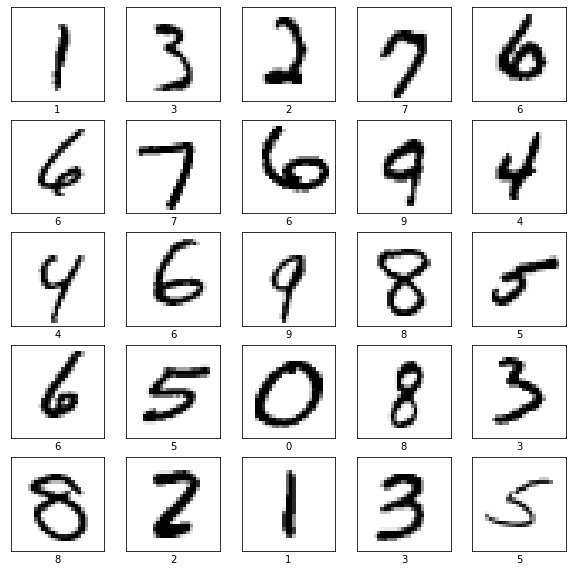

In [12]:
#exploring the processed data: Part 2
plt.figure(figsize=(10,10))
for i, (image,label) in enumerate(val_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image , cmap=plt.cm.binary)
  plt.xlabel(classes[label])
plt.show()

In [13]:
batch_size=320

In [14]:
model=tf.keras.Sequential([
                           tf.keras.layers.Reshape((28,28,1)),
                           tf.keras.layers.Conv2D(32 , 3 , padding = 'same' , activation=tf.nn.relu,
                                                  input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D((2,2), strides = 2),

                           #tf.keras.layers.Conv2D(64 , 1 , padding='same' , activation=tf.nn.relu),
                           #tf.keras.layers.MaxPooling2D((2,2),strides=2),

                           #tf.keras.layers.Conv2D(128,(3,3) , padding = 'same' , activation=tf.nn.relu),
                           #tf.keras.layers.MaxPooling2D((2,2), strides=2),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(128 , activation=tf.nn.relu),
                           tf.keras.layers.Dense( 10 , activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)
val_dataset = val_dataset.cache().repeat().batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [17]:
epochs = 10
history = model.fit(train_dataset , epochs=epochs , steps_per_epoch= math.ceil(num_train_examples/320.0) , validation_data= val_dataset, validation_steps = math.ceil(val_ds_size/320.0) )

Epoch 1/10
92/92 [==============================] - 33s 13ms/step - loss: 0.5017 - accuracy: 0.8510 - val_loss: 0.2255 - val_accuracy: 0.9345
Epoch 2/10
92/92 [==============================] - 1s 9ms/step - loss: 0.2047 - accuracy: 0.9384 - val_loss: 0.1424 - val_accuracy: 0.9592
Epoch 3/10
92/92 [==============================] - 1s 9ms/step - loss: 0.1425 - accuracy: 0.9578 - val_loss: 0.1057 - val_accuracy: 0.9695
Epoch 4/10
92/92 [==============================] - 1s 9ms/step - loss: 0.1082 - accuracy: 0.9672 - val_loss: 0.0884 - val_accuracy: 0.9752
Epoch 5/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0917 - accuracy: 0.9717 - val_loss: 0.0775 - val_accuracy: 0.9767
Epoch 6/10
92/92 [==============================] - 1s 9ms/step - loss: 0.0824 - accuracy: 0.9746 - val_loss: 0.0716 - val_accuracy: 0.9778
Epoch 7/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.0669 - val_accuracy: 0.9784
Epoch 8/10
92/92 [

In [18]:
predictions=model.predict(test_dataset , steps=math.ceil(num_test_examples/320.0), verbose=True)
#print('Accuracy on test dataset{}'.format(test_accuracy))

88/88 [==============================] - 1s 10ms/step


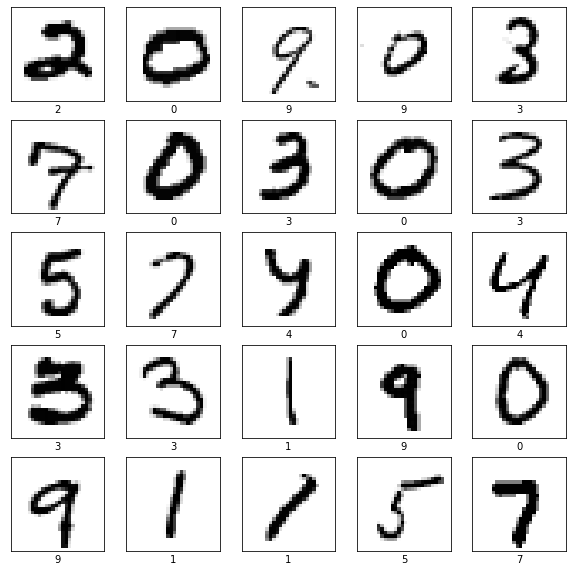

In [19]:
plt.figure(figsize=(10,10))
for i,image in enumerate(test_dataset1.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(image , cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  xlabel=np.argmax(predictions[i])
  plt.xlabel(classes[xlabel])
plt.show()

Text(0.5, 1.0, 'Training and Validation Loss')

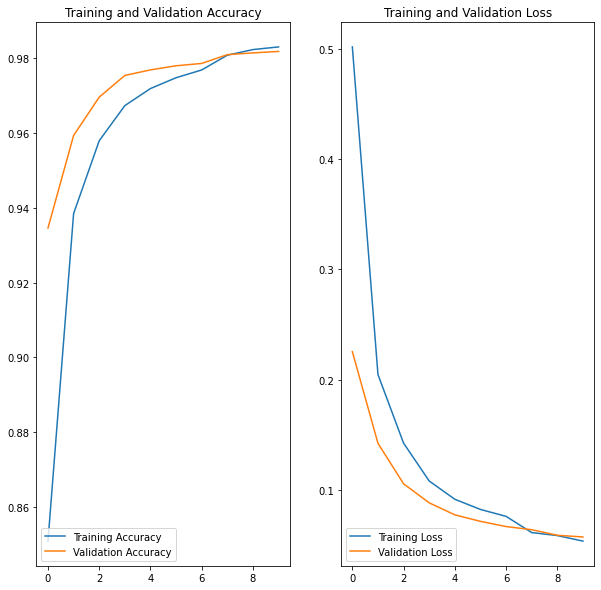

In [25]:
#add the val_loss and test_loss and accuracy graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range , acc , label = 'Training Accuracy')
plt.plot( epochs_range , val_acc , label = 'Validation Accuracy')
plt.legend(loc= 3)
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range , loss , label = 'Training Loss')
plt.plot(epochs_range , val_loss , label ='Validation Loss')
plt.legend(loc=3)
plt.title('Training and Validation Loss')

In [20]:
test_df 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
lst = []
for i in range(28000):
  feature_label = np.argmax(predictions[i]) 
  lst.append(classes[feature_label])
#print(lst)
result_df=pd.DataFrame(lst)
print(result_df)

       0
0      2
1      0
2      9
3      9
4      3
...   ..
27995  9
27996  7
27997  3
27998  9
27999  2

[28000 rows x 1 columns]


In [22]:
#converting the results to a .csv file
result = result_df.to_csv('/content/gdrive/My Drive/digit-recognizer/result.csv')